In [2]:
!pip install multion==1.3.4 > /dev/null


[notice] A new release of pip available: 22.3.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [3]:
from multion.client import MultiOn

In [4]:
MultiOn_api_key = "YOUR-MULTION-KEY"

client = MultiOn(api_key=MultiOn_api_key)

In [22]:
retrieve_response = client.retrieve(
    url="https://www2.hm.com/en_us/men/products/view-all.html",
    cmd="Get all items and their name, price, colors, purchase url, and image url.",
    fields=["name", "price", "colors", "purchase_url", "image_url"],
    render_js=True,
    scroll_to_bottom=True
)

data = retrieve_response.data

In [23]:
data[0]

{'name': 'Slim Fit Ribbed Tank Top',
 'price': '8.99',
 'colors': 'White/Black/Gray melange/Dark brown/Gray melange',
 'purchase_url': 'https://www2.hm.com/en_us/productpage.1158014005.html',
 'image_url': 'https://image.hm.com/assets/hm/56/f0/56f0527467252393fb5d4e59c09eb88521303233.jpg?imwidth=256'}

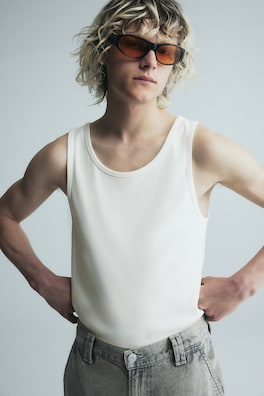

In [24]:
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

image_url = data[0]["image_url"]

response = requests.get(image_url)

if response.status_code == 200:
    image = Image.open(BytesIO(response.content))
    display(image)
else:
    print("Failed to retrieve the image")
